In [1]:
import numpy as np
import pandas as pd
import itertools as iter
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import f_oneway, ttest_ind
import pylab
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error

In [2]:
file_name_1 = 'bulk_data_1.csv'
file_name_2 = 'bulk_data_2.csv'
file_name_3 = 'Surface_data.csv'

data_1 = pd.read_csv(file_name_1)
data_1.rename(columns={'Unnamed: 0':'Index'}, inplace=True )


data_2 = pd.read_csv(file_name_2)
data_2.rename(columns={'Unnamed: 0':'Index'}, inplace=True )

data_3 = pd.read_csv(file_name_3)
data_3.rename(columns={'Unnamed: 0':'Index'}, inplace=True )

In [3]:
data_1.columns

Index(['Index', 'Frequency', 'acceptor_type', 'Type', 'rHO', 'rOO', 'tOHO',
       'sOH'],
      dtype='object')

In [4]:
data_2.columns

Index(['Index', 'Frequency', 'acceptor_type', 'Type', 'rHO', 'rOO', 'tOHO',
       'sOH'],
      dtype='object')

In [5]:
data_3.columns

Index(['Index', 'Frequency', 'acceptor_type', 'Type', 'EFddec', 'EFfc', 'rHO',
       'rOO', 'tOHO', 'sOH', 'sOHQM'],
      dtype='object')

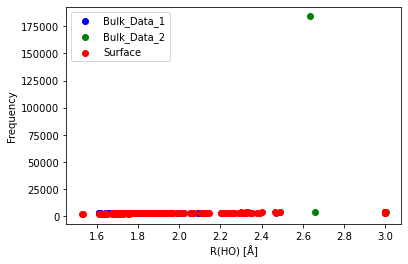

In [6]:
data_1_freq = data_1["Frequency"]
data_1_roo = data_1["rHO"]

data_2_freq = data_2["Frequency"]
data_2_roo = data_2["rHO"]

data_3_freq = data_3["Frequency"]
data_3_roo = data_3["rHO"]

plt.xlabel("R(HO) [Å]")
plt.ylabel("Frequency")

plt.scatter(data_1_roo, data_1_freq, color='blue', label="Bulk_Data_1")
plt.scatter(data_2_roo, data_2_freq, color='green', label="Bulk_Data_2")
plt.scatter(data_3_roo, data_3_freq, color='red',label="Surface")

plt.legend()

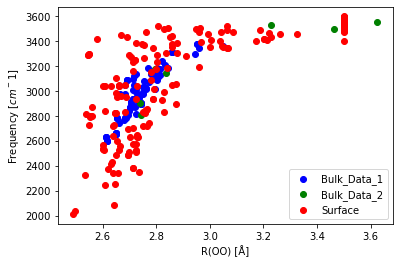

In [7]:
data_1_dropna = data_1.dropna(subset=["Frequency"])
data_2_dropna = data_2.dropna(subset=["Frequency"])
data_3_dropna = data_3.dropna(subset=["Frequency"])

data_1_cured = data_1_dropna[data_1_dropna["Frequency"] < 4000]
data_2_cured = data_2_dropna[data_2_dropna["Frequency"] < 4000]
data_3_cured = data_3_dropna[data_3_dropna["Frequency"] < 4000]

data_1_cured_freq = data_1_cured["Frequency"]
data_1_cured_roo = data_1_cured["rOO"]

data_2_cured_freq = data_2_cured["Frequency"]
data_2_cured_roo = data_2_cured["rOO"]

data_3_cured_freq = data_3_cured["Frequency"]
data_3_cured_roo = data_3_cured["rOO"]

plt.xlabel("R(OO) [Å]")
plt.ylabel("Frequency [$cm^-1$]")

plt.scatter(data_1_cured_roo, data_1_cured_freq, color='blue', label="Bulk_Data_1")
plt.scatter(data_2_cured_roo, data_2_cured_freq, color='green', label="Bulk_Data_2")
plt.scatter(data_3_cured_roo, data_3_cured_freq, color='red',label="Surface")

plt.legend()

In [8]:
data_3_cured

,Index,Frequency,acceptor_type,Type,EFddec,EFfc,rHO,rOO,tOHO,sOH,sOHQM
0,0,3577.868,NaN,water,0.000151,0.000402,3.000000,3.500000,100.000000,1.000000,0.8974
1,1,3577.868,NaN,water,0.000152,0.000405,3.000000,3.500000,100.000000,1.000000,0.8970
2,2,3511.409,H2O,water,0.015010,0.032563,3.000000,3.500000,100.000000,0.979721,0.8292
3,3,2952.498,O2-,water,0.053806,0.102202,1.790404,2.653346,142.511457,0.870521,0.7401
4,4,3514.452,OH-,hydroxide,0.039665,0.066010,3.000000,3.500000,100.000000,0.978643,0.8793
...,...,...,...,...,...,...,...,...,...,...,...
212,212,2816.551,OH-,hydroxide,0.109617,0.163932,1.639930,2.539967,147.456023,0.802888,0.7142
213,213,2528.199,OH-,hydroxide,0.110814,0.174560,1.648772,2.603764,155.716061,0.821161,0.7341
214,214,3584.097,NaN,hydroxide,0.032979,0.060920,3.000000,3.500000,100.000000,0.992918,0.9454
215,215,3047.550,OH-,water,0.041758,0.062331,1.917147,2.859469,156.956777,0.900743,0.7842


## ANOVA test between bulk and surface data

### rOO bulk and surface

In [9]:
t_test1, p_value1 = stats.ttest_ind(data_1_cured['rOO'], data_3_cured['rOO'])
t_test2, p_value2 = stats.ttest_ind(data_2_cured['rOO'], data_3_cured['rOO'])

print("t-test bulk 1 and surface: ",t_test1," -> P-value bulk 1 and surface: ",p_value1)
print("t-test bulk 2 and surface: ",t_test2," -> P-value bulk 2 and surface: ",p_value2)

t-test bulk 1 and surface:  -7.402413455236348  -> P-value bulk 1 and surface:  1.2286090163507606e-12
t-test bulk 2 and surface:  0.3042247712077269  -> P-value bulk 2 and surface:  0.7612416262010651


### rHO bulk and surface

In [10]:
t_test1, p_value1 = stats.ttest_ind(data_1_cured['rHO'], data_3_cured['rHO'])
t_test2, p_value2 = stats.ttest_ind(data_2_cured['rHO'], data_3_cured['rHO'])

print("t-test bulk 1 and surface: ",t_test1," -> P-value bulk 1 and surface: ",p_value1)
print("t-test bulk 2 and surface: ",t_test2," -> P-value bulk 2 and surface: ",p_value2)

t-test bulk 1 and surface:  -9.565116784009163  -> P-value bulk 1 and surface:  3.388381606484269e-19
t-test bulk 2 and surface:  -0.3580897929804556  -> P-value bulk 2 and surface:  0.7206163682619209


### tOHO bulk and surface

In [11]:
t_test1, p_value1 = stats.ttest_ind(data_1_cured['tOHO'], data_3_cured['tOHO'])
t_test2, p_value2 = stats.ttest_ind(data_2_cured['tOHO'], data_3_cured['tOHO'])

print("t-test bulk 1 and surface: ",t_test1," -> P-value bulk 1 and surface: ",p_value1)
print("t-test bulk 2 and surface: ",t_test2," -> P-value bulk 2 and surface: ",p_value2)

t-test bulk 1 and surface:  14.301144125320675  -> P-value bulk 1 and surface:  4.2558110349610506e-36
t-test bulk 2 and surface:  1.753241904154521  -> P-value bulk 2 and surface:  0.08094069154683187


## sOH bulk1 and bulk2

In [12]:
t_test1, p_value1 = stats.ttest_ind(data_1_cured['sOH'], data_2_cured['sOH'])

print("t-test bulk 1 and surface: ",t_test1," -> P-value bulk 1 and surface: ",p_value1)

t-test bulk 1 and surface:  -5.031649525493093  -> P-value bulk 1 and surface:  2.020340252987838e-06


## Frequency bulk1 and sOH

In [13]:
t_test1, p_value1 = stats.ttest_ind(data_1_cured['Frequency'], data_2_cured['sOH'])

print("t-test bulk 1 and surface: ",t_test1," -> P-value bulk 1 and surface: ",p_value1)

t-test bulk 1 and surface:  40.32219803009756  -> P-value bulk 1 and surface:  1.0164037718314656e-65


In [14]:
from scipy.stats import f_oneway, ttest_ind

# Perform ANOVA on the "rOO" descriptor
anova_result = f_oneway(data_1_cured["rOO"], data_2_cured["rOO"], data_3_cured["rOO"])
print("ANOVA Result:")
print("============================================================================================================")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)
print()

# Perform pairwise t-tests for specific claims/comparisons
def perform_t_test(data1, data2, comparison):
    ttest_result = ttest_ind(data1, data2)
    if ttest_result.pvalue < 0.05:
        print(f"Reject the null hypothesis for {comparison}")
        print("p-value:", ttest_result.pvalue)
    else:
        print(f"Fail to reject the null hypothesis for {comparison}") # no sufficient evidence for a significant difference or relationship between the variables being tested.
        print("p-value:", ttest_result.pvalue)
    print()

# Test the claim: 
perform_t_test(data_1_cured["rOO"], data_3_cured["rOO"], "rOO bulk 1 vs. surface data")

# Test the claim: 
perform_t_test(data_2_cured["rOO"], data_3_cured["rOO"], "rOO bulk 2 vs. surface data")

ANOVA Result:
F-statistic: 27.78824934226416
p-value: 7.406567568338792e-12

Reject the null hypothesis for rOO bulk 1 vs. surface data
p-value: 1.2286090163507606e-12

Fail to reject the null hypothesis for rOO bulk 2 vs. surface data
p-value: 0.7612416262010651



In [15]:
# Perform ANOVA on the "rHO" descriptor
anova_result = f_oneway(data_1_cured["rHO"], data_2_cured["rHO"], data_3_cured["rHO"])
print("ANOVA Result:")
print("============================================================================================================")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)
print()

# Perform pairwise t-tests for specific  claims/comparisons
def perform_t_test(data1, data2, comparison):
    ttest_result = ttest_ind(data1, data2)
    if ttest_result.pvalue < 0.05:
        print(f"Reject the null hypothesis for {comparison}")
        print("p-value:", ttest_result.pvalue)
    else:
        print(f"Fail to reject the null hypothesis for {comparison}") # no sufficient evidence for a significant difference or relationship between the variables being tested.
        print("p-value:", ttest_result.pvalue)
    print()

# Test the claim: 
perform_t_test(data_1_cured["rHO"], data_3_cured["rHO"], "rHO bulk 1 vs. surface data")

# Test the claim: 
perform_t_test(data_2_cured["rHO"], data_3_cured["rHO"], "rHO bulk 2 vs. surface data")

ANOVA Result:
F-statistic: 45.69772397072966
p-value: 3.4370251703537922e-18

Reject the null hypothesis for rHO bulk 1 vs. surface data
p-value: 3.388381606484269e-19

Fail to reject the null hypothesis for rHO bulk 2 vs. surface data
p-value: 0.7206163682619209



In [16]:
# Perform ANOVA on the "tOHO" descriptor
anova_result = f_oneway(data_1_cured["tOHO"], data_2_cured["tOHO"], data_3_cured["tOHO"])
print("ANOVA Result:")
print("============================================================================================================")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)
print()

# Perform pairwise t-tests for specific claims/comparisons
def perform_t_test(data1, data2, comparison):
    ttest_result = ttest_ind(data1, data2)
    if ttest_result.pvalue < 0.05:
        print(f"Reject the null hypothesis for {comparison}")
        print("p-value:", ttest_result.pvalue)
    else:
        print(f"Fail to reject the null hypothesis for {comparison}") # no sufficient evidence for a significant difference or relationship between the variables being tested.
        print("p-value:", ttest_result.pvalue)
    print()

# Test the claim: 
perform_t_test(data_1_cured["tOHO"], data_3_cured["tOHO"], "tOHO bulk 1 vs. surface data")

# Test the claim: 
perform_t_test(data_2_cured["tOHO"], data_3_cured["tOHO"], "tOHO bulk 2 vs. surface data")

ANOVA Result:
F-statistic: 103.19888239551084
p-value: 2.4595915025566114e-35

Reject the null hypothesis for tOHO bulk 1 vs. surface data
p-value: 4.2558110349610506e-36

Fail to reject the null hypothesis for tOHO bulk 2 vs. surface data
p-value: 0.08094069154683187



## PCA analysis on bulk 1 and surface

In [17]:
data_3_cured

,Index,Frequency,acceptor_type,Type,EFddec,EFfc,rHO,rOO,tOHO,sOH,sOHQM
0,0,3577.868,NaN,water,0.000151,0.000402,3.000000,3.500000,100.000000,1.000000,0.8974
1,1,3577.868,NaN,water,0.000152,0.000405,3.000000,3.500000,100.000000,1.000000,0.8970
2,2,3511.409,H2O,water,0.015010,0.032563,3.000000,3.500000,100.000000,0.979721,0.8292
3,3,2952.498,O2-,water,0.053806,0.102202,1.790404,2.653346,142.511457,0.870521,0.7401
4,4,3514.452,OH-,hydroxide,0.039665,0.066010,3.000000,3.500000,100.000000,0.978643,0.8793
...,...,...,...,...,...,...,...,...,...,...,...
212,212,2816.551,OH-,hydroxide,0.109617,0.163932,1.639930,2.539967,147.456023,0.802888,0.7142
213,213,2528.199,OH-,hydroxide,0.110814,0.174560,1.648772,2.603764,155.716061,0.821161,0.7341
214,214,3584.097,NaN,hydroxide,0.032979,0.060920,3.000000,3.500000,100.000000,0.992918,0.9454
215,215,3047.550,OH-,water,0.041758,0.062331,1.917147,2.859469,156.956777,0.900743,0.7842


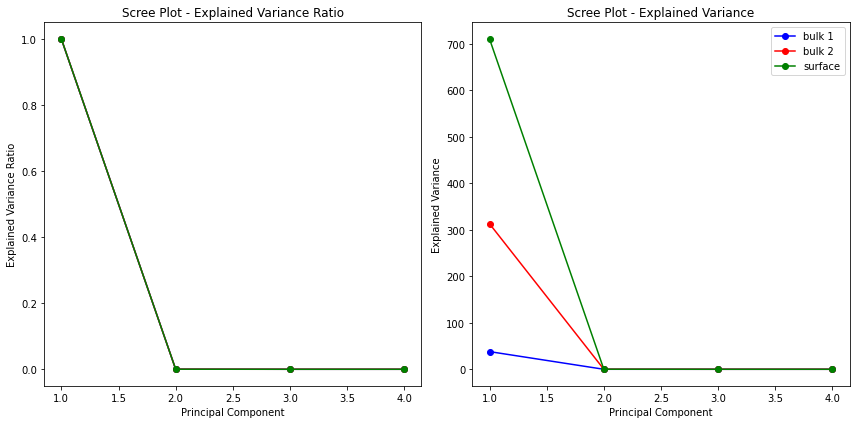

In [18]:
# Organize the data
# Merge bulk and surface data
data_1_cured_PCA = np.array(data_1_cured.loc[:, ['rHO','rOO','tOHO','sOH']])
data_2_cured_PCA = np.array(data_2_cured.loc[:, ['rHO','rOO','tOHO','sOH']])
data_3_cured_PCA = np.array(data_3_cured.loc[:, ['rHO','rOO','tOHO','sOH']])

# Load the data
X_1 = data_1_cured_PCA
X_2 = data_2_cured_PCA
X_3 = data_3_cured_PCA

#y = data_3_cured_LDA

# Perform PCA on bulk 1
pca1 = PCA()
X_pca1 = pca1.fit_transform(X_1)

# Perform PCA on bulk 2
pca2 = PCA()
X_pca2 = pca2.fit_transform(X_2)

# Perform PCA on surface
pca3 = PCA()
X_pca3 = pca3.fit_transform(X_3)


# Calculate the explained variance ratio and variance
explained_variance_ratio_1 = pca1.explained_variance_ratio_
explained_variance_1 = pca1.explained_variance_

explained_variance_ratio_2 = pca2.explained_variance_ratio_
explained_variance_2 = pca2.explained_variance_

explained_variance_ratio_3 = pca3.explained_variance_ratio_
explained_variance_3 = pca3.explained_variance_


# Plot PCA results
# Create the scree plot for explained variance ratio 
num_components = len(explained_variance_ratio_1)
num_components2 = len(explained_variance_ratio_2)
num_components3 = len(explained_variance_ratio_3)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, num_components + 1), explained_variance_ratio_1, 'bo-', label ='bulk 1')
plt.plot(np.arange(1, num_components2 + 1), explained_variance_ratio_2, 'ro-', label ='bulk 2')
plt.plot(np.arange(1, num_components3 + 1), explained_variance_ratio_3, 'go-', label ='surface')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot - Explained Variance Ratio')

# Create the scree plot for actual variance
plt.subplot(1, 2, 2)
plt.plot(np.arange(1, num_components + 1), explained_variance_1, 'bo-', label ='bulk 1')
plt.plot(np.arange(1, num_components2 + 1), explained_variance_2, 'ro-', label ='bulk 2')
plt.plot(np.arange(1, num_components3 + 1), explained_variance_3, 'go-', label ='surface')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Scree Plot - Explained Variance')

plt.legend()

plt.tight_layout()
plt.show()

## LDA bulk 1 and surface data

In [19]:
data_1_cured['Data_Type'] = 'Bulk 1'
data_1_cured['Target'] = 0
data_2_cured['Data_Type'] = 'Bulk 2'
data_2_cured['Target'] = 1
data_3_cured['Data_Type'] = 'Surface'
data_3_cured['Target'] = 2
merged_data = pd.concat([data_1_cured, data_2_cured, data_3_cured])
merged_data

<ipython-input-19-3813586150a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_cured['Data_Type'] = 'Bulk 2'
<ipython-input-19-3813586150a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2_cured['Target'] = 1


,Index,Frequency,acceptor_type,Type,rHO,rOO,tOHO,sOH,Data_Type,Target,EFddec,EFfc,sOHQM
0,0,2835.330710,H2O,water,1.700949,2.700508,173.394783,0.829656,Bulk 1,0,NaN,NaN,NaN
1,1,3183.645055,O2-,water,1.803902,2.768058,164.461785,0.854042,Bulk 1,0,NaN,NaN,NaN
2,2,3035.028611,O2-,water,1.770575,2.750204,167.845087,0.844688,Bulk 1,0,NaN,NaN,NaN
3,3,2897.650546,H2O,water,1.711288,2.708017,173.473205,0.833939,Bulk 1,0,NaN,NaN,NaN
4,4,3294.220653,O2-,water,1.966437,2.945567,173.304077,0.893110,Bulk 1,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,212,2816.551000,OH-,hydroxide,1.639930,2.539967,147.456023,0.802888,Surface,2,0.109617,0.163932,0.7142
213,213,2528.199000,OH-,hydroxide,1.648772,2.603764,155.716061,0.821161,Surface,2,0.110814,0.174560,0.7341
214,214,3584.097000,NaN,hydroxide,3.000000,3.500000,100.000000,0.992918,Surface,2,0.032979,0.060920,0.9454
215,215,3047.550000,OH-,water,1.917147,2.859469,156.956777,0.900743,Surface,2,0.041758,0.062331,0.7842


In [20]:
from sklearn import datasets
iris = datasets.load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
merged_data_LDA = np.array(merged_data.loc[:, ['Frequency','rHO','rOO','tOHO','sOH']])

#data_1_cured_LDA = np.array(data_1_cured.loc[:, ['Frequency','rHO','rOO','tOHO','sOH']])
#data_2_cured_LDA = np.array(data_2_cured.loc[:, ['Frequency','rHO','rOO','tOHO','sOH']])
#data_3_cured_LDA = np.array(data_3_cured.loc[:, ['Frequency','rHO','rOO','tOHO','sOH']])

merged_data_np = np.array(merged_data.loc[:,['Target']])

merged_data_y = merged_data['Target'].values.tolist()
merged_data_y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,


In [22]:
merged_data.Data_Type

0       Bulk 1
1       Bulk 1
2       Bulk 1
3       Bulk 1
4       Bulk 1
        ...   
212    Surface
213    Surface
214    Surface
215    Surface
216    Surface
Name: Data_Type, Length: 324, dtype: object

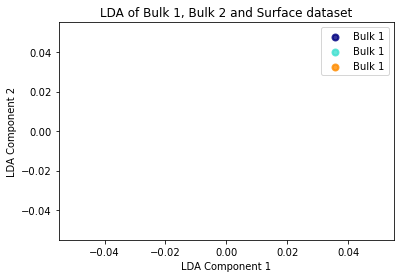

In [31]:
# Separate the features and the target variable
X = merged_data_LDA  # Features from bulk1, bulk2 and surface
y = merged_data_y  # Target variable

# Perform Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plot the results
data_type = merged_data.Data_Type
colors = ['navy', 'turquoise', 'darkorange']
plt.figure()
for color, i, data_type in zip(colors, [0, 1, 2], data_type):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, alpha=0.8, lw=2, 
label=data_type)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Bulk 1, Bulk 2 and Surface dataset')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.show()

In [24]:
merged_data.Data_Type

0       Bulk 1
1       Bulk 1
2       Bulk 1
3       Bulk 1
4       Bulk 1
        ...   
212    Surface
213    Surface
214    Surface
215    Surface
216    Surface
Name: Data_Type, Length: 324, dtype: object

In [25]:
# Load the data
X = data_1_cured["rOO"]
y = data_3_cured["rOO"]

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plot LDA results
plt.subplot(1, 2, 2)
#target_names = iris.target_names
colors = ['navy', 'turquoise', 'darkorange']
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, alpha=0.8, lw=2, 
    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('LDA of Bulk 1 and Surface Data')
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')

plt.tight_layout()
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[2.70050765 2.76805811 2.75020397 2.70801659 2.94556667 2.71444733
 2.72227863 3.04885043 2.73482275 2.80726772 2.75024089 2.72545494
 2.80438538 2.69486543 2.75866362 2.73206558 2.79813594 2.72460462
 2.95860726 2.68006911 2.66242571 2.79654983 2.72234381 2.81575602
 2.83152072 2.68715829 2.75077164 2.724444   2.72139711 2.71662567
 2.7624476  2.79625429 2.84375519 2.78396384 2.72525387 2.71528636
 2.69207043 2.66409085 2.71920126 2.79804077 2.74427197 2.74427197
 2.74427197 2.61387889 2.61387889 2.61387889 2.65236891 2.65236891
 2.65236891 2.72373434 2.72373434 2.72373434 2.65084026 2.65084026
 2.65084026 2.74420805 2.74420805 2.74420805 2.68307307 2.68307307
 2.68307307 2.61613312 2.61613312 2.61613312 2.71375469 2.71375469
 2.71375469 2.65001498 2.65001498 2.65001498 2.70217965 2.70217965
 2.70217965 2.70763124 2.70763124 2.70763124 2.69196833 2.69196833
 2.69196833 2.86032155 2.86032155 2.86032155 2.79463789 2.79463789
 2.79463789 2.95096404 2.95096457 2.68489361 2.75335817 2.73575768
 2.81522786 2.71431181 2.68427758 2.82236092 2.80401064 2.70199938
 2.78241409 2.76101714 2.79310864 2.77221815].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## PCA and LDA on bulk 2 and surface 1

In [26]:
# Separate features and labels
X = data_2_cured["rOO"]
y = data_3_cured["rOO"]

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Perform LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plot PCA results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
colors = ['navy', 'turquoise', 'darkorange']
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
    plt.title('PCA')
    plt.xlabel('PCA of Component 1')
    plt.ylabel('PCA of Component 2')

# Plot LDA results
plt.subplot(1, 2, 2)
colors = ['navy', 'turquoise', 'darkorange']
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], color=color, alpha=0.8, lw=2, 
    label=target_name)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.title('LDA of Bulk 1 and Surface Data')
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')

plt.tight_layout()
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[3.46208268 3.62430108 3.22931499 2.79455487 2.83764688 2.7380398
 2.74378375].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [27]:
# Combine the data sets
bulk_data = pd.concat([data_1, data_2])
#bulk_data.drop('H2O')
surface_data = data_3

#--> which descriptors do you want to perform the anova test on

## Kernel ridge regression

In [28]:
t=np.arange(250)
tt = np.random.shuffle(t)
t

array([142, 100,  43, 195,  94,  26, 108, 221, 211,  11, 132,  10,  52,
       245,  15,  49, 152,  27,  95, 232,  42, 214,  45,  61,  13,  64,
       146, 164, 125, 119, 170, 144, 248, 102,  51,  71,  62, 231,  58,
        93, 244,  69,  20,  24,  23, 243,  96, 230,  86, 163, 192, 182,
       199, 158,  25,  99, 197, 174, 200,  70, 237,  87, 155, 249,  41,
       106, 177, 219, 167, 113,   6,  33,  36, 128,   0, 184, 183, 209,
       109,  65, 110, 239, 175, 139, 181,  29, 234, 190, 114, 246, 101,
        81, 193, 228, 145,   8, 131,  63, 169,  67,  39,  68,   2,  85,
       111, 140, 138, 198,  47, 208,   1,   7,  79, 223, 171, 160, 188,
       168,   5,  92,  74, 173,  19, 115, 165, 134, 224, 129, 187, 194,
       176, 135, 122,  31, 217, 147,  40, 178,  75, 143, 157, 154, 124,
        32,  56, 148, 136, 229, 220, 207,  89,  37, 242,  91,  18,  46,
       202,  84, 149, 130, 238, 247, 205,   9, 215, 141, 159, 172, 204,
       201, 118, 179, 186,  72, 153, 203,  22,  28,  55,  57, 15

In [30]:
# Create a linear regression model
model = LinearRegression()

# Train the model with the entire dataset
model.fit(data_1_cured[data_1_cured["Frequencies"]])

# Generate new data points with x-values in the range [1, 2]
new_x = np.array([[1.5, 1.7, 1.2, 1.8, 1.9],   # Example 1
                  [1.2, 1.5, 1.8, 1.4, 1.7],   # Example 2
                  [2.0, 1.5, 2.0, 1.3, 1.6]])  # Example 3

# Predict the y-values for the new data points
new_y = model.predict(new_x)

# Create the scatter plot
plt.scatter(new_x[:, 0], new_y, color='red', label='Extrapolated Data')

# Add labels and title to the plot
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Extrapolated Data Plot')

# Show the legend
plt.legend()

# Display the plot
plt.show()

KeyError: 'Frequencies'